## Chapter 3 평가

앞에서는 모델 예측 성능의 평가를 위해 정확도(Accuracy)를 이용했다. 하지만 이 밖에도 여러 가지 방법으로 예측 성능을 평가할 수 있다. <br/> 성능 평가 모델은 일반적으로 모델이 분류냐 회귀냐에 따라 다르다. <br/> 분류의 성능 평가 지표는 다음과 같다.
- 정확도(Accuracy)
- 오차행렬(Confusion Matrix0
- 정밀도(Precision)
- 재현율(Recall)
- F1 스코어
- ROC AUC

분류의 경우 결정 클래스 값 종류의 유형에 따라 이진 분류와 선택 분류로 나뉠 수 있다. 위의 지표들은 모두 적용되는 지표이지만  특히 이진 분류에서 더욱 중요하게 강조하는 지표이다.

### 1. 정확도(Accuracy)

정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표이며 전체 예측 데이터 건수에서 예측 결과가 동일한 데이터 건수의 비율이다. 직관적으로 모델 예측 성능을 나타낸다. 하지만 불균형한 데이터에 의한 정확도의 착시 현상에 속지 않도록, 특히 이진 판단일 경우 주의해야 한다.

### 2. 오차 행렬

이진 분류에서 성능 지표로 잘 활용되는 오차 행렬(confusion matrix, 혼동행렬)은 학습된 분류 모델이 예측을 수행하면성 얼마나 핫갈려하는지도 함께 보여주는 지표이다.

![오차 행렬](./images/confusionMatrix.png)

위의 TN, FP, FN, TP로 각 4분면을 채우고 이를 다양하게 결합해 분류 모델 성능의 오류가 어떠한 모습으로 발생하는 지 알 수 있다. <br/> 사이킷런 역시 이를 위한 API를 제공한다.

```python
from sklearn.metricx import confusion_matrix

confusion_matrix(y_test, pred)
```

이렇게 하면 반환값으로 각 행렬에 위치하는 값의 수가 2차원 리스트로 반환된다.

### 3. 정밀도와 재현율

정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표이다.
- 정밀도 = TP / (FP + TP)
- 재현율 = TP / (FN + TP)

정밀도는 예측을 긍정으로 한 대상 중 실제 값이 긍정으로 일치한 데이터의 비율이다. <br/> 재현율은 실제 값이 긍정인 대상 중 예측과 실제 값이 긍정으로 일치한 데이터의 비율이다. <br/> 각각 업무 특성에 따라 특정 지표가 더 중요한 지표로 간주될 수 있다.

- 재현율이 더 중요한 경우 : 실제 긍정인 예측을 부정으로 잘못 판단하면 업무상 큰 영향을 끼치는 경우
- 정밀도가 더 중요한 경우 : 실제 부정인 예측을 긍정으로 잘못 판단하면 업무상 큰 영향을 끼치는 경우

In [1]:
# 오차 행렬 및 정밀도, 재현율을 모두 구하는 함수를 만들어보자.
# 사이킷런은 정밀도 계산을 위해 precision_score()를,
# 재현율 계산을 위해 recall_score()를 제공한다.

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [2]:
# 타이타닉 생존자 예측 후 위 함수를 실행시켜 보자.
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator

# 이전에 타이타닉 전처리때 만든 함수들
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 분할
titanic_df = pd.read_csv('./data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)


X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)


X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율: 0.7869


C:\Users\korea_1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### 정밀도/재현율 트레이드 오프

정밀도와 재현율은 상호 보완적인 평가지표이기 때문에 하나를 높이면 하나는 낮아지기 쉽다. 이런 사이를 trade off라고 한다. <br/><br/> 사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블에 속하는지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구한다. 그리고 예측 확률이 큰 레이블값으로 예측하게 된다. 사이킷런은 개별 데이터별로 예측 확률을 반환하는 predict_proba()를 제공한다. 테스트 피처 데이터 세트를 파라미터로 입력하면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환한다.

In [3]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 shape : {0}'.format(pred_proba.shape))
print('pred_proba() array에서 앞 3개만 샘플로 추출 \n :', pred_proba[:3])

# 예측 확률 array와 예측 결과값 array를 병합(concatenate)해 예측 확률과 결과 값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])
print('0번째 칼럼이 0확률 1번째 칼럼이 1확률')

pred_proba() 결과 shape : (179, 2)
pred_proba() array에서 앞 3개만 샘플로 추출 
 : [[0.46170212 0.53829788]
 [0.87864222 0.12135778]
 [0.87728507 0.12271493]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46170212 0.53829788 1.        ]
 [0.87864222 0.12135778 0.        ]
 [0.87728507 0.12271493 0.        ]]
0번째 칼럼이 0확률 1번째 칼럼이 1확률


In [4]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

#### 정밀도와 재현율의 맹점

Positive 예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경된다. 임곗값의 이러한 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용되어야 한다. 하나만 극단적으로 높이면 안된다.

##### 정밀도 100%가 되는 방법

확실한 기준이 되는 경우만 긍정 예측, 나머지는 부정 예측 1000명 중 진짜 확실한 1명만 암환자 긍정 예측을 하고 나머진 다 부정 예측 시 100%

##### 재현율 100%가 되는 방법

모든 환자를 긍정 예측

### 4. F1 스코어

![f1score](./images/f1score.png)

F1 스코어는 정밀도와 재현율을 결합한 지표이다. 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가집니다.<br/> 사이킷런에서도 이를 위한 API를 제공한다.
```python
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어 : {0:.4f}'.format(f1))
```

### 5. ROC 곡선과 AUC

![roc](./images/ROC.png)

ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표이다. ROC 곡선은 우리말로 수신자 판단 곡선으로 불린다. <br/> ROC 곡선은 FPR(False Positive Rate)가 변할 때 TPR(True Positive Rate)가 어떻게 변하는지를 나타내는 곡선이다. FPR을  X축으로 TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타난다. <br/>TPR은 곧 재현율이다. 이는 곧 민감도로도 불리며 이에 대응하는 지표로 TNR(True Negative Rate)라고 불리는 특이성이 있다. 특이성은 다음과 같이 구할 수 있다. <br/><br/>FPR = FP / (FP + TN) = 1 - TNR = 1 - 특이성 <br/><br/> ROC 곡선은 직선에 가까울수록 성능이 떨어지는 것이며 멀어질수록 성능이 뛰어난 것이다. <br/> ROC 곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화 값을 구한다. FPR을 0부터 1까지 변경하는 방법은 분류 결정 임곗값을 변경하는 것이다. (predict 에서의) FPR을 0으로 만드려면 임곗값을 1로 지정하면 된다. 

In [5]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출. 
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값:  [0.97 0.65 0.63 0.57 0.45 0.38 0.31 0.13 0.12 0.11 0.1 ]
샘플 임곗값별 FPR:  [0.    0.017 0.034 0.076 0.127 0.186 0.237 0.576 0.619 0.754 0.814]
샘플 임곗값별 TPR:  [0.033 0.639 0.705 0.754 0.803 0.852 0.902 0.902 0.951 0.967 1.   ]


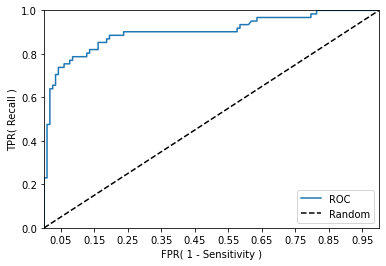

In [6]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는 데 이용하며 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정한다. 이는 ROC 곡선 밑의 면적을 구한 것으로써 1에 가까울수록 좋은 수치이다. AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건이다.

In [7]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9024


In [8]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

### 6. 피마 인디언 당뇨병 예측

피마 인디언 당뇨병 데이터 세트를 이용해 당뇨병 여부를 판단하는 머신러닝 예측 모델을 만들고 지금까지 알아본 평가 지표를 적용해보자. <br/> 피처는 다음과 같다.

- Pregnancies : 임신 횟수
- Giucose : 포도당 부하 검사 수치
- BloodPressure : 혈압(mm Hg)
- SkinThickness : 팔 삼두근 뒤 쪽의 피하지방 측정값(mm)
- Insulin : 혈청 인슐린(mu U/ml)
- BMI : 체질량 지수
- DiabetesPedigreeFunction : 당뇨 내력 가중치 값
- Age : 나이
- Outcome : 클래스 결정 값 (0 또는 1)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('./data/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [10]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출. 
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출 
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습,예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741,          F1: 0.6392, AUC:0.7919


C:\Users\korea_1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


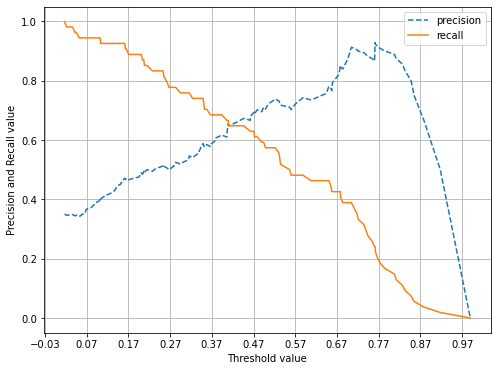

In [12]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [13]:
# 정밀도와 재현율이 비슷한 임곗값은 0.42쯤 하지만 둘 다 어느정도 낮다. (0.7)

diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

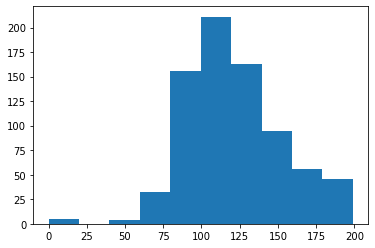

In [14]:
# min이 0으로 되어 있는 값들이 많다.
# 특히 포도당 수치인 'Gloucose'가 0인 것은 말이 되지 않는다.
plt.hist(diabetes_data['Glucose'], bins=10)

In [15]:
# min() 값이 0으로 되어 있는 피처에 대해 0 값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인하자.

# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [16]:
# SkinThickness와 Insulin은 0값의 비율이 너무 크다.
# 0값을 삭제하기는 힘들 것 같고 (전체 데이터 수가 적어서) 이를 평균값으로 대체하자.

# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())

In [17]:
# 여기에 이제 스케일링을 적용하는 것이 좋다.

X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,          F1: 0.6804, AUC:0.8433


In [18]:
# 성능 수치가 일정 수준 개선되었다.
# 분류 결정 임곗값을 변화시키면서 재현율 값의 성능 수치가 어느 정도나 개선되는지 확인해보자.
# 임곗값을 0.3에서 0.5까지 0.03씩 변화시키면서 재현율과 다른 평가 지표의 값 변화를 출력한다.
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963,          F1: 0.6615, AUC:0.8433
임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778,          F1: 0.6774, AUC:0.8433
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222,          F1: 0.6667, AUC:0.8433
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037,          F1: 0.6667, AUC:0.8433
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667,          F1: 0.6792, AUC:0.8433
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667,          F1: 0.6857, AUC:0.8433
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,          F1: 0.6931, AUC:0.8433
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,          F1: 0.6804, AUC:0.8433


In [19]:
from sklearn.tree import export_graphviz

## Chapter 4 분류

### 1. 분류(Classification)의 개요

분류는 다양한 머신러닝 알고리즘으로 구현할 수 있다.
- 베이즈 통계와 생성 모델에 기반한 나이브 베이즈
- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀
- 데이터 균일도에 따른 규칙 기반의 결정 트리
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신
- 근접 거리를 기준으로 하는 최소 근접 알고리즘
- 심층 연결 기반의 신경망
- 서로 다른 머신러닝 알고리즘을 결합한 앙상블

우리는 앙상블을 집중적으로 다룬다. 앙상블은 서로 다른 또는 같은 알고리즘을 단순히 결합한 형태도 있으나, 일반적으로는 배깅과 부스팅 방식으로 나뉜다. 배깅 방식의 대표는 랜덤 포레스트 등이 있다. 근래의 앙상블 방법은 부스팅 방식으로 발전하고 있다. 앙상블의 기본 알고리즘으로 일반적으로 사용하는 것은 결정트리이다.

### 2. 결정 트리

![tree](./images/tree.png)

결정 트리9Decision Tree)는 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것이다. 쉽게 생각하면 스무고개 게임과 유사하다.
규칙 노드(Decision Node)와 리프 노드(Leaf Node)로 나뉜다. 규칙 노드는 규칙 조건을 제시하고 리프 노드는 결정된 클래스 값이다.
데이터 세트에 피처가 있고 새로운 규척 조건을 만들 때마다 규칙 노드가 만들어진다. (Sub Tree 생성) 하지만 트리의 깊이가 깊어질수록 과적합을 유발할 수도 있다.
따라서 가능한 적은 결정 노드로 높은 예측 정확도를 가지기 위해 트리를 어떻게 분할할 것인가가 중요한대 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요하다.

### 일단 정보 이득과 지니 계수 생략

#### 결정 트리 모델 특징

가장 큰 장점은 균일도라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이며 시각화 표현까지 가능하다. 정보의 균일도만 신경쓰면 되기 때문에 각 피처의 스케일링과 정규화와 같은 전처리 작업이 필요 없다. 가장 큰 단점은 과적합으로 정확도가 떨어진다는 점이다. 모델이 학습 데이터 기반의 정확도를 높이기 위해 계속 조건을 추가하며 트리가 깊어지면 이는 복잡한 학습 모델에 이르고, 이는 실제 상황에 유연하게 대처할 수 없다.

#### 결정 트리 파라미터

사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier와 DecisionTreeRegressor 클래스를 재공한다. 각각 분류와 회귀를 위한 클래스이다. 여기서는 분류를 위한 경우만 다룬다. 파라미터는 다음과 같다.

- min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합 제어에 사용됨. 디폴트는 2, 작을 수록 노드 증가, 과적합 가능성 증가
- min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수로 과적합 제어 용도이다. 비대칭적 데이터의 경우 작게 설정해야 한다.
- max_features : 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트는 None으로 모든 피처를 사용.
    - int 형으로 지정하면 대상 피처의 개수
    - float 형으로 지정하면 전체 피처 중 대성 피처의 퍼센트
    - 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수)만큼 선정
    - 'auto'는 sqrt와 동일
    - 'log'는 전체 피처 중 log2(전체 피처 개수)선정
    - 'None'은 전체 피처 선정
- max_depth : 트리의 최대 깊이를 규정하며 디폴트는 None이다. 이 경우 완벽하게 클래스 결정 갑이 될 때까지 깊이를 계속 키운다. min_samples_split의 제한을 받을 때까지 계속 깊이를 증가시킨다. 과적합에 유의해야 한다.
- max_leaf_nodes : 말단 노드의 최대 개수

#### 결정 트리 모델의 시각화

Graphviz 이용

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [21]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

In [23]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("./tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH